# Спринт 8. Приоритет гипотез и анализ A/B теста. 

**Контекст проекта:**
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Выделите приоритетные гипотезы, запустите A/B-тест и проанализируйте результаты.

In [1]:
# загрузка библиотек
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# настройка окружения
#pd.options.display.max_columns=None
pd.options.display.float_format='{: .2f}'.format
sns.set(style="darkgrid")
# %config InlineBackend.figure_format = 'svg'

# настройка конвертации дат для графиков
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## **Часть 1. Приоритет гипотез.**
В файле hypothesis.csv **9 гипотез** по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
***
**Задача**
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.
***
**Описание данных**
Файл hypothesis.csv
Hypothesis — краткое описание гипотезы;
Reach — охват пользователей по 10-балльной шкале;
Impact — влияние на пользователей по 10-балльной шкале;
Confidence — уверенность в гипотезе по 10-балльной шкале;
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [2]:
# загрузка исходных данных
df_hypo = pd.read_csv('/datasets/hypothesis.csv')

#### 1.1. Приоритизация гипотез по фреймворку ICE

In [3]:
df_hypo['ICE'] = df_hypo['Impact'] * df_hypo['Confidence'] / df_hypo['Efforts']
df_hypo.sort_values(by='ICE', ascending=False, inplace=True)
df_hypo.style.set_properties(subset='Hypothesis', **{'width': '400px', 'text-align': 'left'}).format({'ICE': '{:.2f}'})

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


#### 1.2. Приоритизация гипотез по фреймворку RICE

In [4]:
df_hypo['RICE'] = df_hypo['Reach'] * df_hypo['Impact'] * df_hypo['Confidence'] / df_hypo['Efforts']
df_hypo.sort_values(by='RICE', ascending=False, inplace=True)

(df_hypo.style.set_properties(subset='Hypothesis', **{'width': '400px', 'text-align': 'left'})
            .format({'ICE': '{:.2f}', 'RICE': '{:.2f}'})
            .background_gradient(cmap=sns.light_palette('limegreen', as_cmap=True), subset=['ICE', 'RICE']))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


**Вывод:** По методу ICE приритет у гипотез, в порядке убывания: **8, 0, 7.** При использовании метода RICE добавляется дополнительный множитель 'Reach', учитывающий степень охвата клиентской базы , и на первые места выходят гипотезы с высоким показателем охвата: **7, 2, 0.** **Таким образом, по обоим методам лидируют гипотезы 0 и 7.** По RICE наиболее перспективно выглядит гипотеза **'7': 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'.**


## **Часть 2. Анализ A/B-теста**
Вы провели A/B-тест и получили результаты, которые описаны в файлах orders.csv и visitors.csv.
***
**Задача**
Проанализируйте A/B-тест:
- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.
***
**Описание данных**
Файл orders.csv
transactionId — идентификатор заказа;
visitorId — идентификатор пользователя, совершившего заказ;
date — дата, когда был совершён заказ;
revenue — выручка заказа;
group — группа A/B-теста, в которую попал заказ.
Файл visitors.csv
date — дата;
group — группа A/B-теста;
visitors — количество пользователей в указанную дату в указанной группе A/B-теста

#### 2.1. График кумулятивной выручки и кумулятивного среднего чека по группам

In [5]:
# загрузка исходных данных
df_orders = pd.read_csv('/datasets/orders.csv')
df_visitors = pd.read_csv('/datasets/visitors.csv')

In [6]:
# преобразование столбцов с датой в формат datetime64
df_orders['date'] = pd.to_datetime(df_orders['date'], format='%Y:%m:%d', infer_datetime_format=True)
df_visitors['date'] = pd.to_datetime(df_visitors['date'], format='%Y:%m:%d', infer_datetime_format=True)

In [7]:

df_orders_cummulative_A = df_orders.apply(
    lambda x: df_orders[(df_orders['date'] <= x['date']) & (df_orders['group'] == 'A')]
    .agg({'date':'max', 'transactionId':'nunique', 'revenue':'sum'}),
    axis=1).drop_duplicates().sort_values(by='date')
df_orders_cummulative_A = df_orders_cummulative_A.rename(columns={'transactionId':'orders'})

df_orders_cummulative_B = df_orders.apply(
    lambda x: df_orders[(df_orders['date'] <= x['date']) & (df_orders['group'] == 'B')]
    .agg({'date':'max', 'transactionId':'nunique', 'revenue':'sum'}),
    axis=1).drop_duplicates().sort_values(by='date')
df_orders_cummulative_B = df_orders_cummulative_B.rename(columns={'transactionId':'orders'})

# проверка. общая сумма заказов должна совпадать с последней строкой кумулятивной выручки по группам
# итог должен быть равен "0"
#display(df_orders_cummulative_B.tail(1)['revenue'] + df_orders_cummulative_A.tail(1)['revenue'] - df_orders['revenue'].sum())

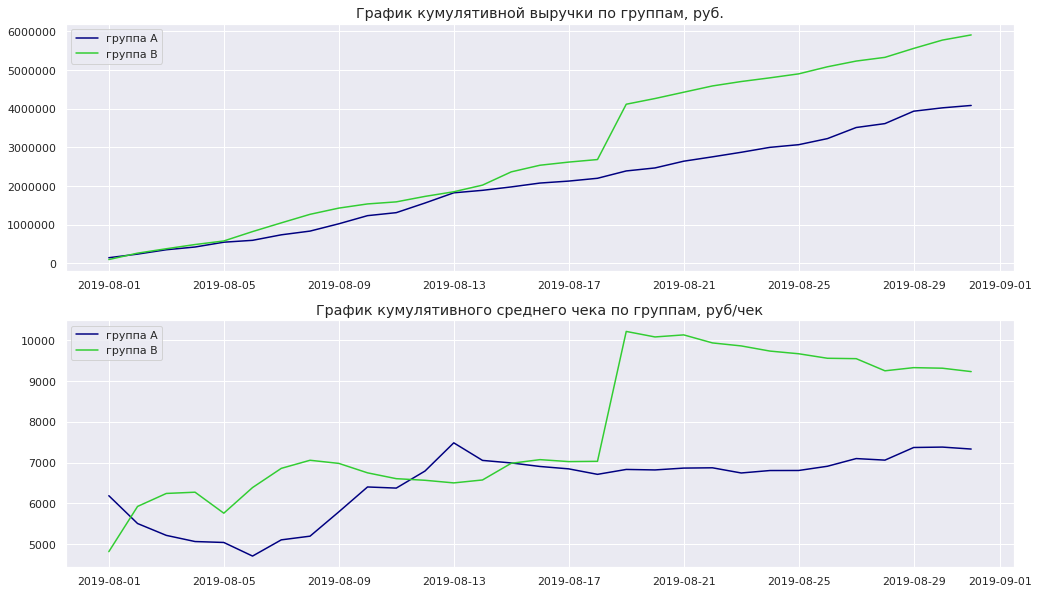

In [8]:

fig, axes = plt.subplots(2 , 1, figsize=(17, 10))
axes[0].plot(df_orders_cummulative_A['date'], df_orders_cummulative_A['revenue'], color='navy')
axes[0].plot(df_orders_cummulative_B['date'], df_orders_cummulative_B['revenue'], color='limegreen')
axes[0].set_title('График кумулятивной выручки по группам, руб.', fontdict={'fontsize': 'x-large'})
axes[0].set_xlabel('')
axes[0].legend( ['группа A', 'группа B'], loc = 'upper left', ncol=1 );

axes[1].plot(df_orders_cummulative_A['date'], 
             df_orders_cummulative_A['revenue'] / df_orders_cummulative_A['orders'], color='navy')
axes[1].plot(df_orders_cummulative_B['date'], 
             df_orders_cummulative_B['revenue'] / df_orders_cummulative_B['orders'], color='limegreen')
axes[1].set_title('График кумулятивного среднего чека по группам, руб/чек', fontdict={'fontsize': 'x-large'});
axes[1].set_xlabel('')
axes[1].legend( ['группа A', 'группа B'], loc = 'upper left', ncol=1 );

**Вывод:** Графики кумулятивной выручки и кумулятивного среднего чека ведут себя схоже до 18 августа 2019. В этот день происходит взрывной рост выручки в группе В. Затем градус наклона графиков выручки становится опять идентичным, значение среднего чека по группам начинает сближаться. Вероятно была очень крупная разовая сделка в группе В.

#### 2.2. График относительного изменения кумулятивного среднего чека группы B к группе A

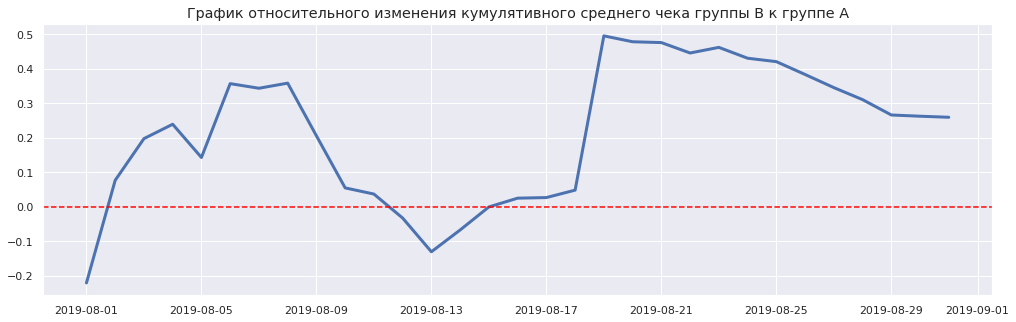

In [9]:
orders_cumm_merged = df_orders_cummulative_A.merge(df_orders_cummulative_B, on='date', suffixes=['-A', '-B'])

fig = plt.figure(figsize=(17, 5))
plt.plot(orders_cumm_merged['date'], 
             (orders_cumm_merged['revenue-B'] / orders_cumm_merged['orders-B']) /
             (orders_cumm_merged['revenue-A'] / orders_cumm_merged['orders-A']) - 1, linewidth=3)
plt.axhline(y=0, linestyle='--', color='red');
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontdict={'fontsize': 'x-large'});

**Вывод:** На старте эксперимента относительное значение испытывает значительные знакопеременные колебания, к концу второй недели эксперимента начинает стабилизировать возле нуля и затем видно влияние разовой крупной сделки произошедшей 18.08.19 в группе В. Средний чек в группе В становится на 50% больше чем в группе А. Потом это соотношение начинает повторно приближаться к нулевой отметке, что подтверждает наличие "выброса". 

#### 2.3. График кумулятивной конверсии по группам.  График относительного изменения кумулятивной конверсии группы B к группе A

In [10]:
# Постройте график кумулятивной конверсии по группам
df_orders_cummulative_A = df_orders_cummulative_A.merge(df_visitors.apply(
    lambda x: df_visitors[(df_visitors['date'] <= x['date']) & (df_visitors['group'] == 'A')]
    .agg({'date':'max', 'visitors':'sum'}), axis=1).drop_duplicates().sort_values(by='date'),
    on='date', how='left')
df_orders_cummulative_B = df_orders_cummulative_B.merge(df_visitors.apply(
    lambda x: df_visitors[(df_visitors['date'] <= x['date']) & (df_visitors['group'] == 'B')]
    .agg({'date':'max', 'visitors':'sum'}), axis=1).drop_duplicates().sort_values(by='date'),
    on='date', how='left')    

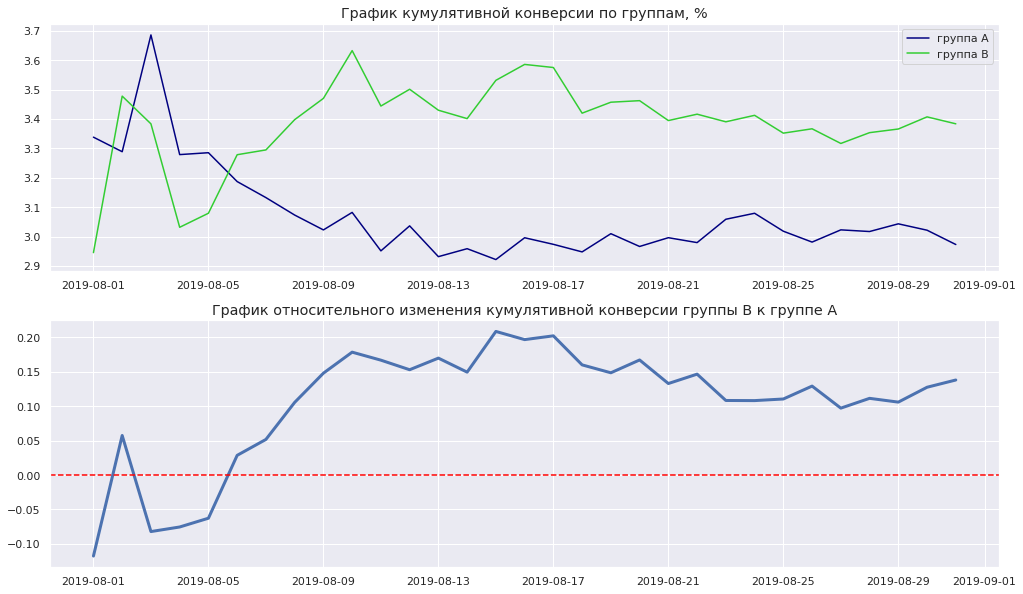

In [11]:
fig, axes = plt.subplots(2 , 1, figsize=(17, 10))

axes[0].plot(df_orders_cummulative_A['date'], 
             df_orders_cummulative_A['orders'] / df_orders_cummulative_A['visitors'] * 100, color='navy')
axes[0].plot(df_orders_cummulative_B['date'], 
             df_orders_cummulative_B['orders'] / df_orders_cummulative_B['visitors'] * 100, color='limegreen')
axes[0].set_title('График кумулятивной конверсии по группам, %', fontdict={'fontsize': 'x-large'});
axes[0].set_xlabel('')
axes[0].legend( ['группа A', 'группа B'], loc = 'upper right', ncol=1 );

axes[1].plot(orders_cumm_merged['date'], 
             (df_orders_cummulative_B['orders'] / df_orders_cummulative_B['visitors']) /
             (df_orders_cummulative_A['orders'] / df_orders_cummulative_A['visitors']) - 1, linewidth=3)
axes[1].axhline(y=0, linestyle='--', color='red');
axes[1].set_title('График относительного изменения кумулятивной конверсии группы B к группе A',
                  fontdict={'fontsize': 'x-large'});

**Вывод:** Стохастические колебания конверсий по группам к 13 агуста выравниваются и начинают колебаться в достаточно узком диапазоне. Имеет место выраженно **лучшая конверсия в группе В.** График относительного изменения дает тот же вывод, поведение линии стабильно и показывет, что **конверсия в группе В на 10-15% лучше чем в группе А.**

#### 2.4. Tочечные графики количества и стоимости заказов по пользователям

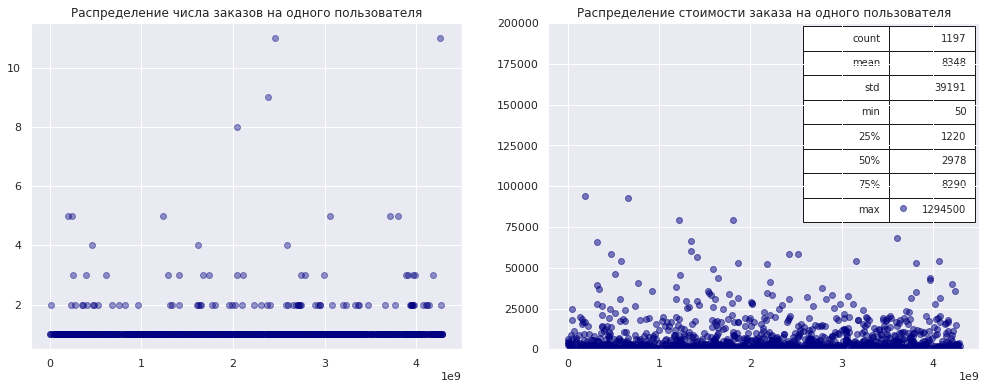

In [12]:
# точечный график количества заказов по пользователям
ordersByUsers = df_orders.groupby('visitorId')['transactionId'].nunique().reset_index()
ordersByUsers.columns = ['visitorId','orders']
fig, axes = plt.subplots(1, 2, figsize=(17, 6))
axes[0].scatter(ordersByUsers['visitorId'], ordersByUsers['orders'], color='navy', alpha=0.4)
axes[0].set_title('Распределение числа заказов на одного пользователя')
axes[1].scatter(df_orders['transactionId'], df_orders['revenue'], color='navy', alpha=0.5)
axes[1].set_title('Распределение стоимости заказа на одного пользователя');
# отсекаем отображение заказов стоимостью больше 200 000 руб.
axes[1].set_ylim(0, 200000) 
# формирование таблицы показателей методом describe для стоимости заказа
table_data = df_orders['revenue'].describe().reset_index()
table_data['revenue'] = table_data['revenue'].astype('int')
axes[1].table(cellText=table_data.values, bbox=( 0.59, 0.39, 0.4, 0.6));

**Вывод:** Большинство пользователей совершили только один заказ, некоторые два, но есть и индивидуумы у которых более 10 заказов. Стоимость заказов также сильно варьируется, имеется рекордный разовый заказ на сумму 1 294 500 руб., при этом медиана стоимости заказа находится на уровне 2 978 руб.  Целесообразно отфильтровать экстремумы заказов.

#### 2.5. Расчет перцентилей 95, 99 для количества и стоимости заказов по пользователям¶

In [13]:
# Расчет 95-й и 99-й перцентили количества заказов и стоимости заказа
print('Перцентили количества заказов на пользователя 95%, 99%:', np.percentile(ordersByUsers['orders'], [95, 99]), 'шт.')
print('Перцентили стоимости заказа пользователя 95%, 99%:', np.percentile(df_orders['revenue'], [95, 99]), 'руб.')

Перцентили количества заказов на пользователя 95%, 99%: [2. 4.] шт.
Перцентили стоимости заказа пользователя 95%, 99%: [28000.  58233.2] руб.


**Вывод: принимаем границей выборки перцентили на уровне 95%. Отсекаем данные по пользователям сделавшим более 2 заказов или заказ на сумму более 28000 руб.**

## Статистическая проверка гипотез

**При проверке всех гипотез устанавливаем alpha = 5%**
***
В нашем случае в каждой группе А и В имеется 31 значение, поэтому для проверки распределения на соответстве нормальному применяем критерий **Шапиро-Уилка** (оптимально при выборке до 50 значений). 
***
Сравниваемые **выборки являются зависимыми**, мы сравниваем одну базу пользователей на на одном сайте, по сути показатель (конверсия, средний чек) до эксперимента (группа А) и после (группа В), в соответствии с гипотезой.**
***
Для проверки гипотез на выборках с нормальным распределением будем использовать **T-критерий Стьдента для парных выборок**, и **W-критерий Уилкоксона** если распределение выборок отлично от нормального.

### Анализ "сырых"  данных

**Подготовка данных**

In [14]:
# создание таблицы заказов сгруппированных по группам А/В и дням
df_orders_group = (df_orders.groupby(['group', 'date'])[['transactionId', 'revenue']]
                  .agg({'transactionId':'nunique', 'revenue':'sum'}).reset_index())  
df_orders_group.columns = ['group', 'date', 'orders', 'revenue']
# объединение с таблицей визитов
df_orders_group = df_orders_group.merge(df_visitors, on=['date', 'group'], how='left')
# расчет и добавление в таблицу показателей конверсии и среднего чека
df_orders_group['conversion%'] = df_orders_group['orders'] / df_orders_group['visitors'] * 100
df_orders_group['receipt'] = df_orders_group['revenue'] / df_orders_group['orders']

In [15]:
# разделение общей таблицы заказов на выборки А и В
sampleA = df_orders_group[df_orders_group['group']=='A'][['date', 'conversion%', 'receipt']]
sampleB = df_orders_group[df_orders_group['group']=='B'][['date', 'conversion%', 'receipt']]

#### 2.6. Проверка статистической значимости различий в конверсии  между группами по «сырым» данным.

**Проверка вида распределения конверсии по критерию Шапиро-Уилка.** 
Для выбора критерия сравнения, проверяем данные на соответствие нормальному распределению.

**Проверяем значения конверсии для рядов А/B и всей выборки. Гипотеза:**
- H0 - распределение выборки соответствует нормальному.
- H1 - распределение выборки отличается от нормального.
- alpha = 5%

In [16]:
table_shapiro = ([['Размер выборки A=B, шт.', sampleA.shape[0]],
    ['Группа A+B, pvalue, %', np.round(st.shapiro(df_orders_group['conversion%'])[1]*100, 2)],
    ['Группа А, pvalue, %', np.round(st.shapiro(sampleA['conversion%'])[1]*100, 2)], 
    ['Группа B, pvalue, %', np.round(st.shapiro(sampleB['conversion%'])[1]*100, 2)]])

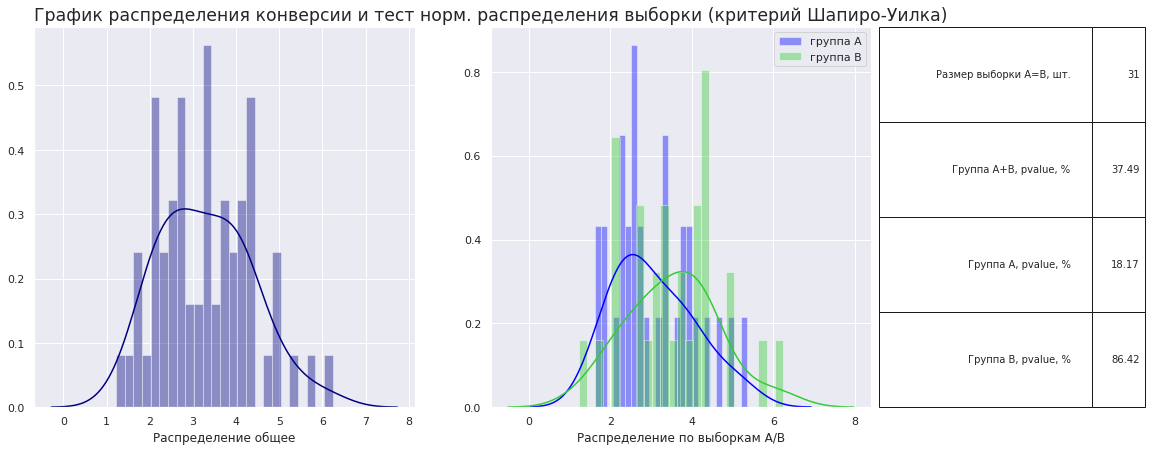

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

sns.distplot(df_orders_group['conversion%'], bins=25, color='navy', ax=axes[0])
sns.distplot(sampleA['conversion%'], bins=25, color='blue', ax=axes[1])
sns.distplot(sampleB['conversion%'], bins=25, color='limegreen', ax=axes[1])
axes[1].table(cellText=table_shapiro, colWidths=[0.8, 0.2], bbox=(1.02, 0, 0.7, 1));

axes[0].set_title(
    'График распределения конверсии и тест норм. распределения выборки (критерий Шапиро-Уилка)',
    loc='left', fontdict={'fontsize':'xx-large'});
axes[1].legend( ['группа A', 'группа B'], loc = 'upper right', ncol=1 )
axes[0].set_xlabel('Распределение общее')
axes[1].set_xlabel('Распределение по выборкам A/B');

Для всех трех рядов значение pvalue превышает принятое значение alpha=5%. **Принимаем H0 о соответствии распределения 
нормальному**, поэтому для проверки равенства средней конверсии для А/В используем **критерий Стьюдента для зависимых выборок.**

**Проверяем гипотезу о равенстве конверсии для рядов А/B. Гипотеза:**
- конверсия рядов А и В равны.
- конверсия рядов А и В отличаются.
- alpha = 5%

In [18]:
print('Проверка равенства конверсии для выборок А/В. Т-критерий Стьюдента, pvalue: {:.2%}'
      .format(st.ttest_rel(sampleA['conversion%'], sampleB['conversion%']).pvalue))

Проверка равенства конверсии для выборок А/В. Т-критерий Стьюдента, pvalue: 6.10%


**Вывод: Принимаем H0, конверсии групп А и В не имеют статистически значимого отличия по "сырым" данным.**

#### 2.7. Проверка статистической значимости различий в среднем чеке между группами по «сырым» данным.

**Проверка вида распределения величины среднего чека по критерию Шапиро-Уилка.** 
Для выбора критерия сравнения, проверяем данные на соответствие нормальному распределению.

**Проверяем значения размера среднего чека для рядов А/B и всей выборки. Гипотеза:**
- H0 - распределение выборки соответствует нормальному.
- H1 - распределение выборки отличается от нормального.
- alpha = 5%

In [19]:
table_shapiro_receipt = ([['Размер выборки A=B, шт.', sampleA.shape[0]],
    ['Группа A+B, pvalue, %', np.round(st.shapiro(df_orders_group['receipt'])[1]*100, 2)],
    ['Группа А, pvalue, %', np.round(st.shapiro(sampleA['receipt'])[1]*100, 2)], 
    ['Группа B, pvalue, %', np.round(st.shapiro(sampleB['receipt'])[1]*100, 2)]])

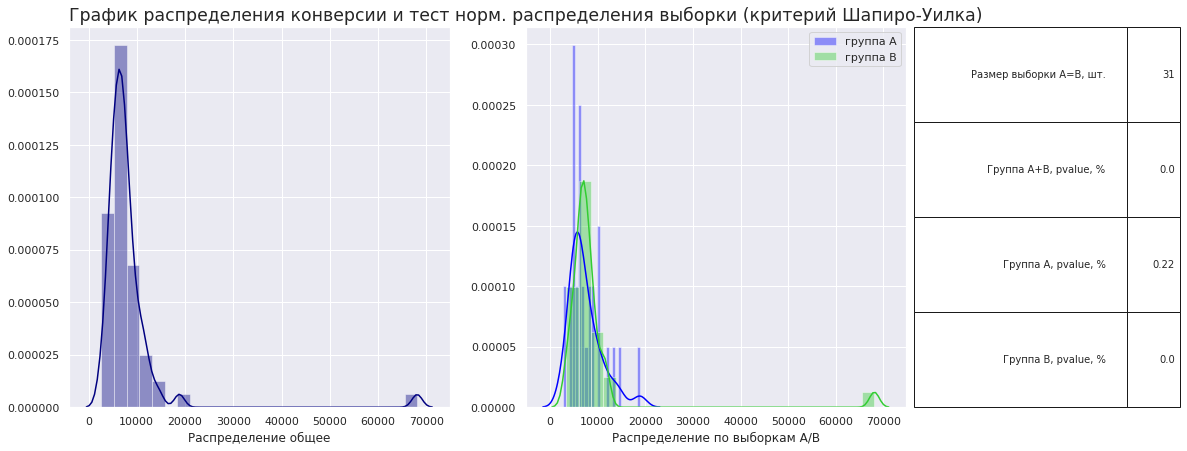

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

sns.distplot(df_orders_group['receipt'], bins=25, color='navy', ax=axes[0])
sns.distplot(sampleA['receipt'], bins=25, color='blue', ax=axes[1])
sns.distplot(sampleB['receipt'], bins=25, color='limegreen', ax=axes[1])
axes[1].table(cellText=table_shapiro_receipt, colWidths=[0.8, 0.2], bbox=(1.02, 0, 0.7, 1));

axes[0].set_title(
    'График распределения конверсии и тест норм. распределения выборки (критерий Шапиро-Уилка)',
    loc='left', fontdict={'fontsize':'xx-large'});
axes[1].legend( ['группа A', 'группа B'], loc = 'upper right', ncol=1 )
axes[0].set_xlabel('Распределение общее')
axes[1].set_xlabel('Распределение по выборкам A/B');

Для всех трех рядов значение pvalue значительно меньше принятого значение alpha=5%. **Отвергаем H0 о соответствии распределения 
нормальному**. Для проверки гипотезы о равенстве размера среднего чека для А/В используем **W-критерий Уилкоксона.**

**Проверяем гипотезу о равенстве среднего чека для рядов А/B. Гипотеза:**
- размер среднего чека рядов А и В равны.
- размер среднего чека рядов А и В отличаются.
- alpha = 5%

In [21]:
print('Проверка равенства среднего чека для выборок А/В. W-критерий Уилкоксона, pvalue: {:.2%}'
      .format(st.wilcoxon(sampleA['receipt'], sampleB['receipt']).pvalue))

Проверка равенства среднего чека для выборок А/В. W-критерий Уилкоксона, pvalue: 49.28%


**Вывод: Принимаем H0, размер среднего чека групп А и В не имеют статистически значимого отличия для 'сырых' данных.**

### Анализ "очищенных" данных.

Создаем список пользователей с числом заказов и суммой чека выходящими за уровень перцентилей 95% для этих значений.

In [22]:
abnormalUsers = pd.concat([ordersByUsers[ordersByUsers['orders'] > 2]['visitorId'],
                          df_orders[df_orders['revenue'] > 28000]['visitorId']], axis=0)
print('Число пользователей создающих статистический выброс в данных:', abnormalUsers.shape[0])

Число пользователей создающих статистический выброс в данных: 90


**Подготовка "очищенных" данных.** Расчет показателей без учета пользователей создающих стат. выбросы по цчилу заказов и сумме заказа.

In [23]:
df_orders_group_filtered = (df_orders[~df_orders['visitorId'].isin(abnormalUsers.values)]
                  .groupby(['group', 'date'])[['transactionId', 'revenue']]
                  .agg({'transactionId':'nunique', 'revenue':'sum'}).reset_index())  
df_orders_group_filtered.columns = ['group', 'date', 'orders', 'revenue']
df_orders_group_filtered = df_orders_group_filtered.merge(df_visitors, on=['date', 'group'], how='left')
df_orders_group_filtered['conversion%'] = df_orders_group_filtered['orders'] / df_orders_group_filtered['visitors'] * 100
df_orders_group_filtered['receipt'] = df_orders_group_filtered['revenue'] / df_orders_group_filtered['orders']
sampleA_filtered = df_orders_group_filtered[df_orders_group_filtered['group']=='A'][['date', 'conversion%', 'receipt']]
sampleB_filtered = df_orders_group_filtered[df_orders_group_filtered['group']=='B'][['date', 'conversion%', 'receipt']]

#### 2.8. "Очищенные данные". Проверка статистической значимости различий в конверсии  между группами.

**Проверка вида распределения конверсии по критерию Шапиро-Уилка.** 

**Проверяем значения конверсии для рядов А/B и всей выборки. Гипотеза:**
- H0 - распределение выборки соответствует нормальному.
- H1 - распределение выборки отличается от нормального.
- alpha = 5%

In [24]:
table_shapiro_filtered = ([['Размер выборки, шт.', sampleA.shape[0]],
    ['Группа A+B, pvalue, %', np.round(st.shapiro(df_orders_group_filtered['conversion%'])[1]*100, 2)],
    ['Группа А, pvalue, %', np.round(st.shapiro(sampleA_filtered['conversion%'])[1]*100, 2)], 
    ['Группа B, pvalue, %', np.round(st.shapiro(sampleB_filtered['conversion%'])[1]*100, 2)]])

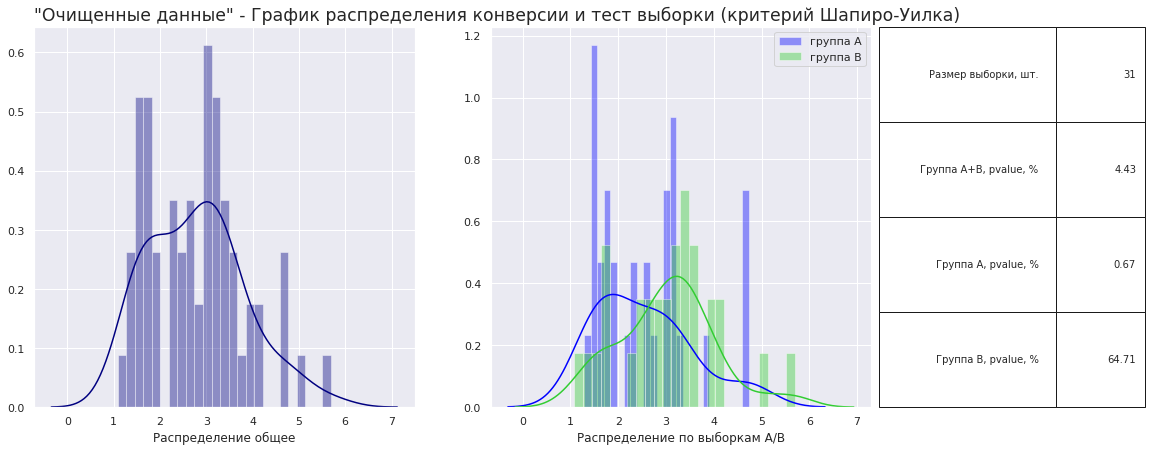

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

sns.distplot(df_orders_group_filtered['conversion%'], bins=25, color='navy', ax=axes[0])
sns.distplot(sampleA_filtered['conversion%'], bins=25, color='blue', ax=axes[1])
sns.distplot(sampleB_filtered['conversion%'], bins=25, color='limegreen', ax=axes[1])
axes[1].table(cellText=table_shapiro_filtered, colWidths=[0.6, 0.3], bbox=(1.02, 0, 0.7, 1));

axes[0].set_title(
    '"Очищенные данные" - График распределения конверсии и тест выборки (критерий Шапиро-Уилка)',
    loc='left', fontdict={'fontsize':'xx-large'});
axes[1].legend( ['группа A', 'группа B'], loc = 'upper right', ncol=1 )
axes[0].set_xlabel('Распределение общее')
axes[1].set_xlabel('Распределение по выборкам A/B');

Для группы А и всей выборки А+В значение pvalue меньше принятого значение alpha=5%. **Отвергаем H0 о соответствии распределения нормальному**. Несмотря на то, что для нулевая гипотеза подтвердилась для группы В, для группы А она отвергнута. Для проверки гипотезы о равенстве размера среднего чека для А/В используем **W-критерий Уилкоксона.** 
***
Существенно, что после "очистки" данных от выбросов характер распределения удалился от нормального для обоих групп А и В. Ожидалось, что удаление экстремумов приблизит распределение к нормальному. Группа А при этом "пострадала" наиболее сильно. Возможно большая часть удаленных экстремумов принадлежала группе А и/или доля удаленных записей в общем числе заказов оказалась слишком значительной.

In [26]:
print('Доля удаленных при "очистке" данных: {:.2%}'
      .format(abnormalUsers.shape[0] / df_orders['visitorId'].shape[0]))

Доля удаленных при "очистке" данных: 7.52%


**Вывод:** доля удаленных данных в **7.52%** от общего числа, вполне может искажать результаты исследования если они неравномерно распределены между выборками.

**Проверяем гипотезу о равенстве конверсии для рядов А/B. Гипотеза:**
- H0 - конверсии рядов А и В равны.
- H1 - конверсии рядов А и В отличаются.
- alpha = 5%

In [27]:
print('Проверка равенства конверсии для выборок А/В. W-критерий Уилкоксона, pvalue: {:.2%}'
      .format(st.wilcoxon(sampleA_filtered['conversion%'], sampleB_filtered['conversion%']).pvalue))

Проверка равенства конверсии для выборок А/В. W-критерий Уилкоксона, pvalue: 4.56%


**Вывод: H0 отвергаем, размер конверсии для групп А и В могут отличаться на принятом уровне значимости.**

#### 2.9. "Очищенные данные". Проверка статистической значимости различий в среднем чеке между группами. 

**Проверка вида распределения величины среднего чека по критерию Шапиро-Уилка.** 
Для выбора критерия сравнения, проверяем данные на соответствие нормальному распределению.

**Проверяем значения размера среднего чека для рядов А/B и всей выборки. Гипотеза:**
- H0 - распределение выборки соответствует нормальному.
- H1 - распределение выборки отличается от нормального.
- alpha = 5%

In [28]:
table_shapiro_receipt_filtered = ([['Размер выборки A=B, шт.', sampleA.shape[0]],
    ['Группа A+B, pvalue, %', np.round(st.shapiro(df_orders_group_filtered['receipt'])[1]*100, 2)],
    ['Группа А, pvalue, %', np.round(st.shapiro(sampleA_filtered['receipt'])[1]*100, 2)], 
    ['Группа B, pvalue, %', np.round(st.shapiro(sampleB_filtered['receipt'])[1]*100, 2)]])

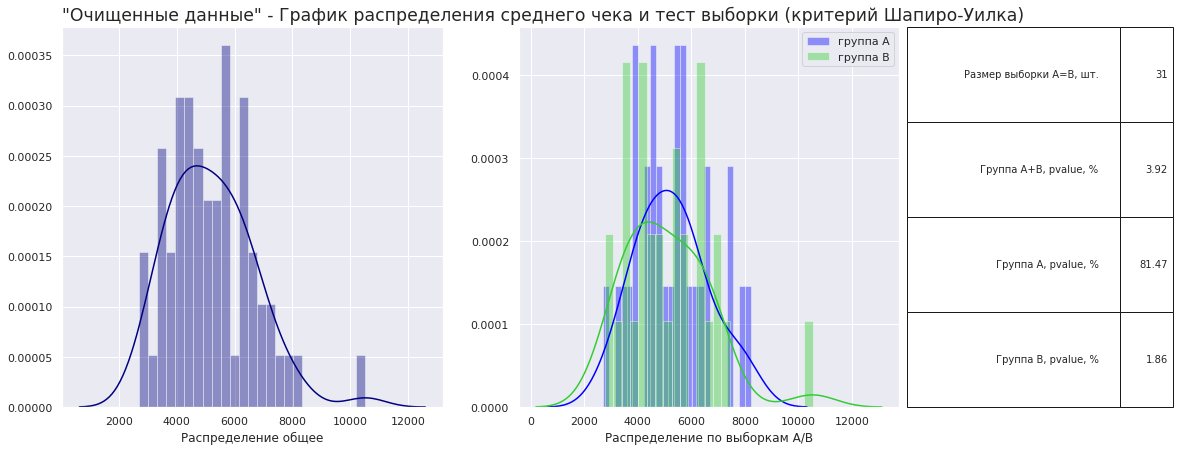

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

sns.distplot(df_orders_group_filtered['receipt'], bins=25, color='navy', ax=axes[0])
sns.distplot(sampleA_filtered['receipt'], bins=25, color='blue', ax=axes[1])
sns.distplot(sampleB_filtered['receipt'], bins=25, color='limegreen', ax=axes[1])
axes[1].table(cellText=table_shapiro_receipt_filtered, colWidths=[0.8, 0.2], bbox=(1.02, 0, 0.7, 1));

axes[0].set_title(
    '"Очищенные данные" - График распределения среднего чека и тест выборки (критерий Шапиро-Уилка)',
    loc='left', fontdict={'fontsize':'xx-large'});
axes[1].legend( ['группа A', 'группа B'], loc = 'upper right', ncol=1 )
axes[0].set_xlabel('Распределение общее')
axes[1].set_xlabel('Распределение по выборкам A/B');

Для группы В и всей выборки А+В значение pvalue меньше принятого значение alpha=5%. **Отвергаем H0 о соответствии распределения нормальному.** Несмотря на то, что для нулевая гипотеза подтвердилась для группы А, для группы В она отвергнута. Для проверки гипотезы о равенстве размера среднего чека для А/В используем **W-критерий Уилкоксона.**
***
До "очистки" данных от выбросов характер распределения отличался от нормального для всех трех групп. После удаления экстремумов распредение для группы А можно считать нормальным с высоким pvalue 81%. Для группы В pvalue также увеличился, но не достиг принятого уровня значимости в 5%. В отличии от конверсии, распределение для значений среднего чека, как и ожидалось, приблизилось к нормальному, но характер этого приближения неравномерный для групп А и В. Причины могут быть аналогичны - малый размер выборки и слишком большая доля удаленных при очистке данных.

**Очищенные данные. Проверяем гипотезу о равенстве среднего чека для рядов А/B. Гипотеза:**
- размер среднего чека рядов А и В равны.
- размер среднего чека рядов А и В отличаются.
- alpha = 5%

In [30]:
print('Проверка равенства среднего чека для выборок А/В. W-критерий Уилкоксона, pvalue: {:.2%}'
      .format(st.wilcoxon(sampleA_filtered['receipt'], sampleB_filtered['receipt']).pvalue))

Проверка равенства среднего чека для выборок А/В. W-критерий Уилкоксона, pvalue: 58.32%


**Вывод: H0 принимаем, на очищенных данных размер среднего чека равен для групп А и В на принятом уровне значимости.**

## Общий вывод.

**Часть 1.** 
***
По обеим методам (ICE и RICE) лидируют гипотезы 0 и 7. **По фреймворку RICE наиболее перспективно выглядит гипотеза '7': 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'.**
***
**Часть 2**
***
**Формальный поход позволяет сделать вывод, что конверсия по группе В может на 10-15% превышать конверсию для группы А на статистически значимомо уровне, при этом отличия в размере среднего чека отсутствуют.**
Тем не менее:
- критерий проверки равенства конверсий оказался на границе принятия 4,56% при alpha=5%, 
- поведение статистических характеристик данных слишком отличается по группам после очистки.
***
**Возможно имеет смысл продлить эксперимент для получения более однозначных данных.**
***
В исходных данных присутствуют значительные выбросы, имеет место разовый заказ в группе В на 1294500 руб. при медиане стоимости заказа 2978 руб. Поэтому, до очистки данных от экстремумов, сравнивать размер среднего чека в группах некорректно.
***
График кумулятивной конверсии показывает **лучшую конверсия в группе В.** График относительного изменения кумулятивной конверсии дает тот же вывод: **конверсия в группе В на 10-15% лучше чем в группе А.**
***
Очистка данных дала неожиданный эффект - распределение конверсии перестало соответствовать нормальному, при этом выражена неравномерность влияния на группу А и В. Возможно большая часть удаленных экстремумов принадлежала группе А и/или доля удаленных записей в общем числе заказов (7.52%) оказалась слишком значительной.
***
При выбранном уровне статистической значимости alpha = 5% не удалось выявить статистически значимой разницы в среднем размере чека по группам А и В - pvalue по W-критерию Уилкоксона 49% и 58%, до и после очистки данных соответственно. Для значения конверсии выявлено статистичеки значимое отличие в средней конверсии для групп А и В после очистки данных: pvalue 4.56% по W-критерию Уилкоксона (до очистки данных 6,1% по критерию Стьюдента).
***
